In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of Picroside III (Metabolite_id = 1288)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1288; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                      price  amount unity               provider_name
date                                                                 
2017-09-29 18:30:34   553.0     5.0    mg                   ChemFaces
2017-09-29 18:30:34   228.0    20.0    mg                   ChemFaces
2017-09-29 18:30:34   262.5     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   337.5     2.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   412.5     3.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   487.5     4.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   562.5     5.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   637.5     6.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   712.5     7.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   787.5     8.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   862.5     9.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   937.5    10.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34 

NaT is the equivalent of NaN for time (NaT = Not a Time)

In [5]:
df.unity.unique()

array(['mg', 'g'], dtype=object)

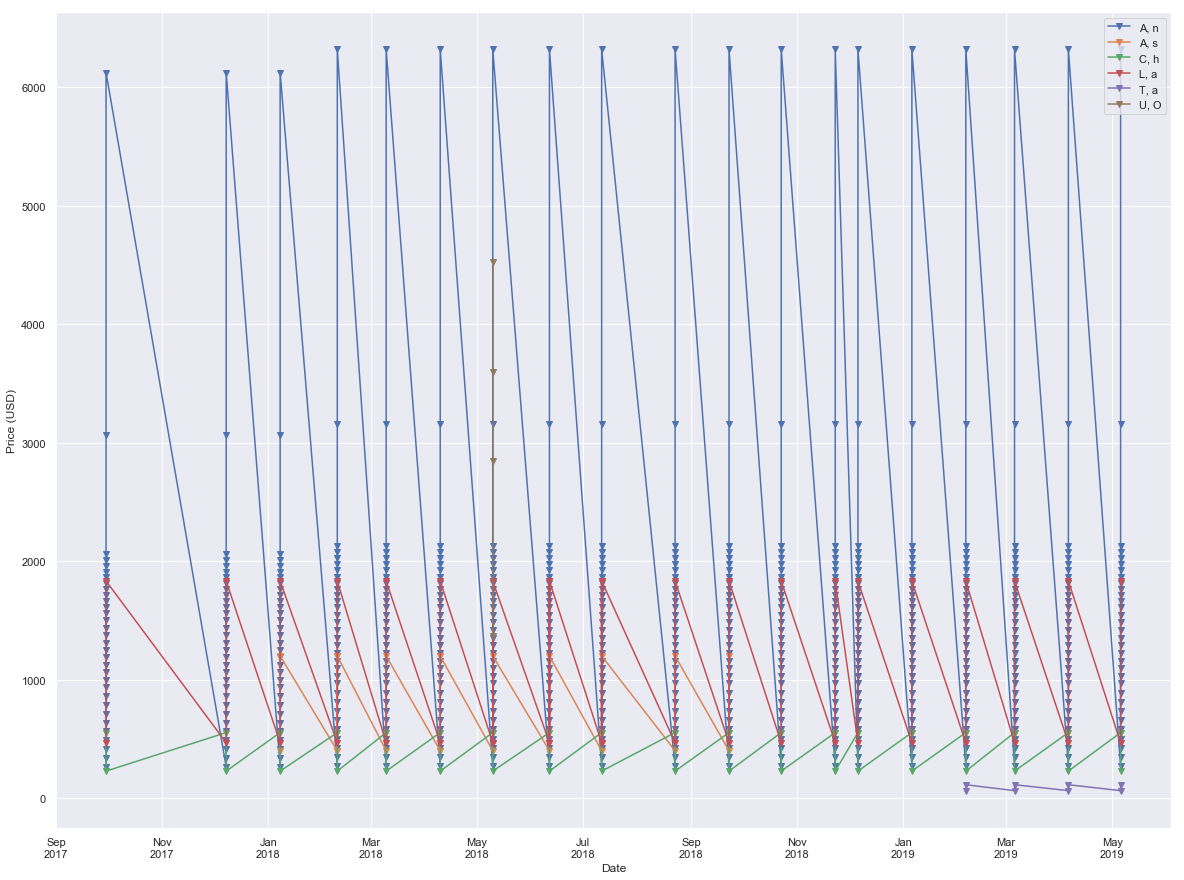

In [6]:
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))


#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [7]:
# Converter mg em g!!
df.amount = np.where(df.unity == 'mg', df.amount/1000, df.amount)  # where True, yield x, otherwise yield y
df = df.replace({'mg':'g'})
print(df)

                      price  amount unity               provider_name
date                                                                 
2017-09-29 18:30:34   553.0   0.005     g                   ChemFaces
2017-09-29 18:30:34   228.0   0.020     g                   ChemFaces
2017-09-29 18:30:34   262.5   0.001     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   337.5   0.002     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   412.5   0.003     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   487.5   0.004     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   562.5   0.005     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   637.5   0.006     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   712.5   0.007     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   787.5   0.008     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   862.5   0.009     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   937.5   0.010     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34 

In [8]:
df.unity.unique()

array(['g'], dtype=object)

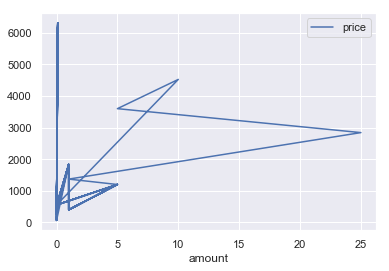

In [9]:
df.plot('amount')

In [10]:
#Converter tudo a 1g e preços respetivos
df.price = np.where(df.amount != 1, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.amount != 1, 1, df.amount)
print(df)

                             price  amount unity               provider_name
date                                                                        
2017-09-29 18:30:34  110600.000000     1.0     g                   ChemFaces
2017-09-29 18:30:34   11400.000000     1.0     g                   ChemFaces
2017-09-29 18:30:34  262500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  168750.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  137500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  121875.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  112500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  106250.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  101785.714286     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   98437.500000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   95833.333333     1.0     g  AnalytiCon Discovery, GmbH

In [11]:
#See results grouped by provider_name
grouped_df = df.groupby('provider_name')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

                             price  amount unity               provider_name
date                                                                        
2017-09-29 18:30:34  262500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  168750.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  137500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  121875.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  112500.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  106250.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34  101785.714286     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   98437.500000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   95833.333333     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   93750.000000     1.0     g  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   90909.090909     1.0     g  AnalytiCon Discovery, GmbH

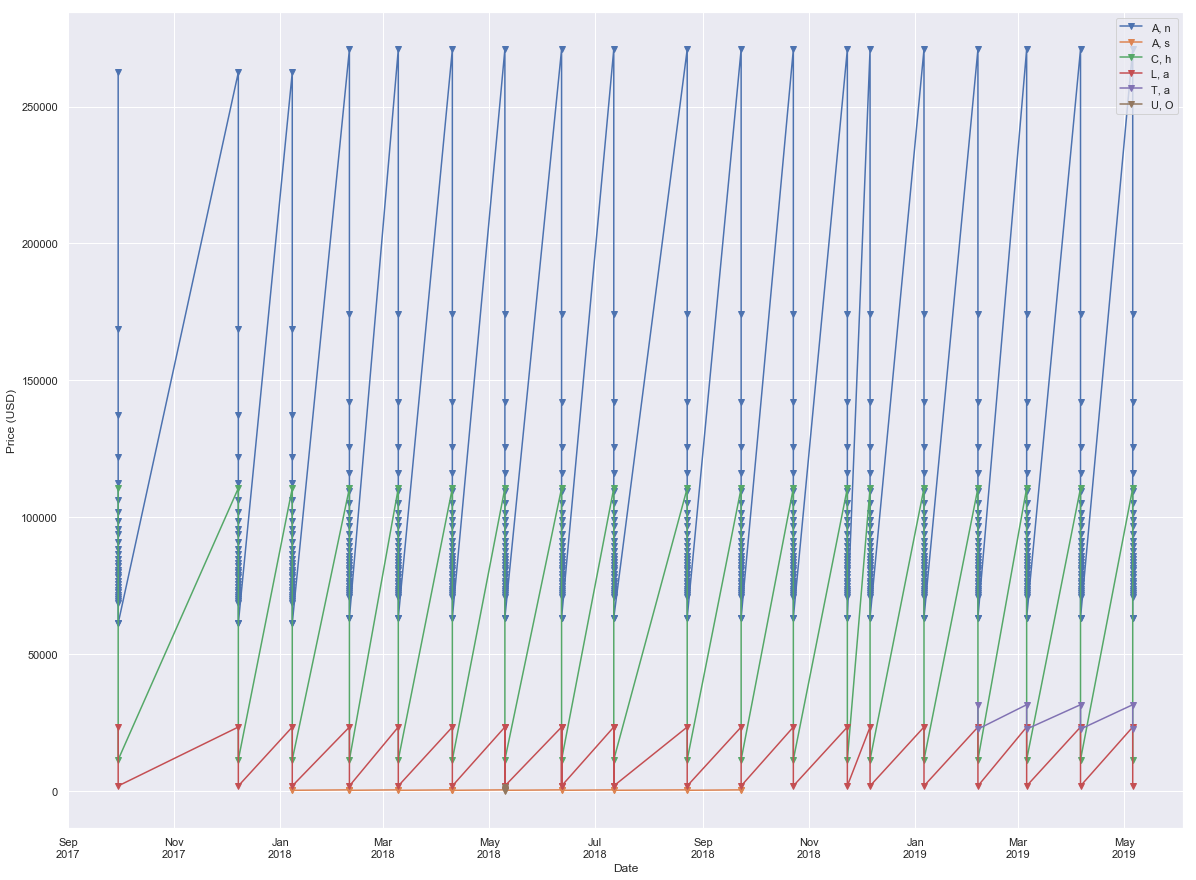

In [12]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))


#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [13]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Picroside III (1g)',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AnalytiCon Discovery, GmbH', 'Astatech …

Aqui é possível ver como o provider UORSY tem vários valores para o mesmo dia e mais nada. Provavelmente só se retirou valores deste dia para este provider mas em diferentes unidades e ao normalizar para 1g ficou como se vê estranho.